In [6]:
import pandas as pd

file_path = "C:/Users/annup/OneDrive/Desktop/restaurant-analysis/dataset/zomato.csv"

# Load the CSV file
df = pd.read_csv(file_path, encoding='latin1')  # 'latin1' handles special characters better

# Preview
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df.drop(['Restaurant ID', 'Address', 'Switch to order menu', 'Rating color'], axis=1, inplace=True)


In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [10]:
df.isnull().sum()


restaurant_name         0
country_code            0
city                    0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                9
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
price_range             0
aggregate_rating        0
rating_text             0
votes                   0
dtype: int64

In [11]:
df.dropna(subset=['cuisines', 'aggregate_rating'], inplace=True)


In [12]:
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')


In [13]:
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')


In [17]:
df['cuisines'].isnull().sum()
df['cuisines'].value_counts().head(10)


cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

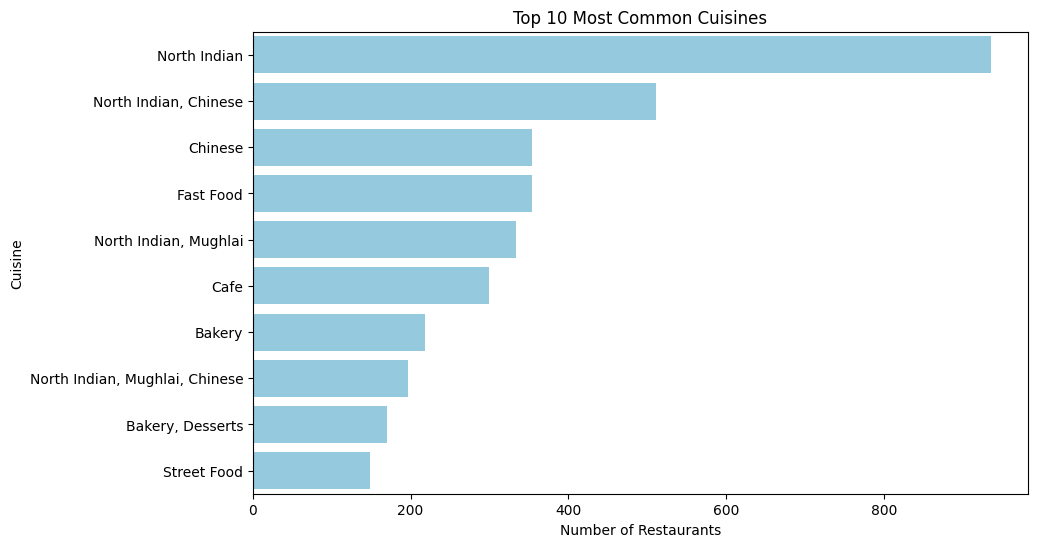

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 cuisines
top_cuisines = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, color='skyblue')  # ✅ no warning
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


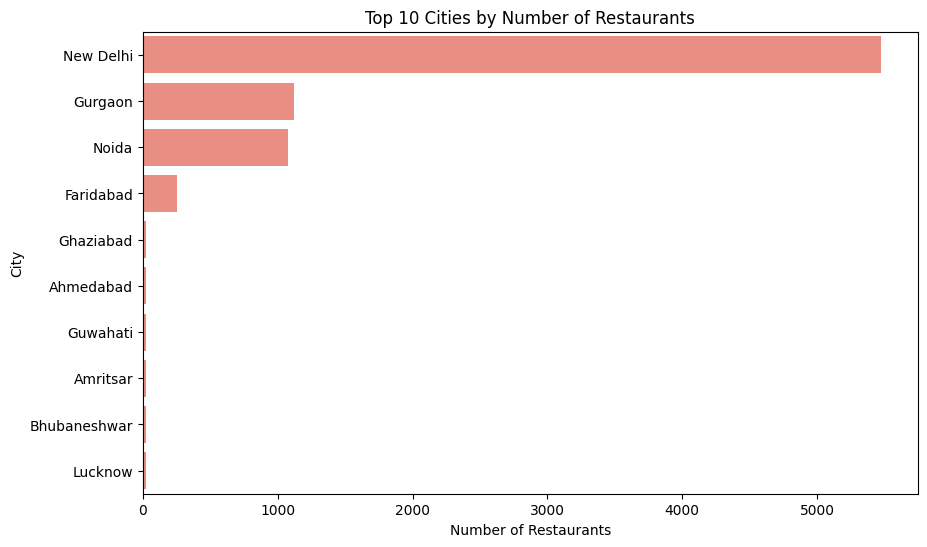

In [21]:
# Top 10 cities by restaurant count
top_cities = df['city'].value_counts().head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, color='salmon')  # No warning
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()



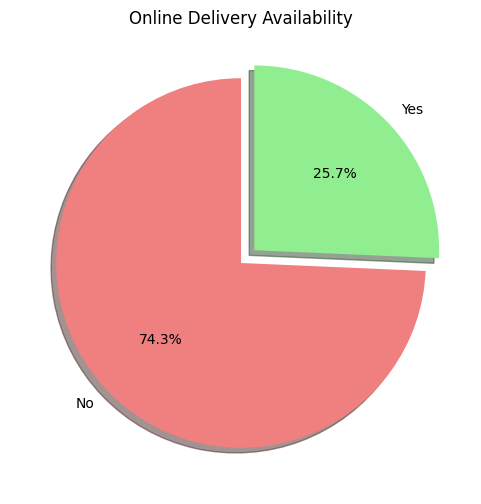

In [22]:
# Count of restaurants offering online delivery
online_delivery = df['has_online_delivery'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
online_delivery.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labels=['No', 'Yes'],
    colors=['lightcoral', 'lightgreen'],
    explode=(0, 0.1),
    shadow=True
)
plt.title("Online Delivery Availability")
plt.ylabel("")
plt.show()



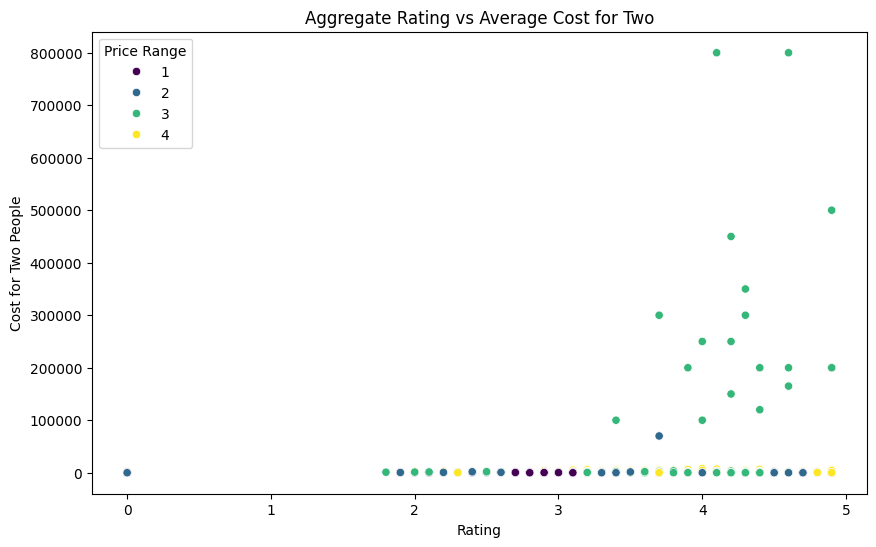

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='aggregate_rating',
    y='average_cost_for_two',
    hue='price_range',
    palette='viridis'
)
plt.title("Aggregate Rating vs Average Cost for Two")
plt.xlabel("Rating")
plt.ylabel("Cost for Two People")
plt.legend(title="Price Range")
plt.show()


In [ ]:
top_rated = df[df['aggregate_rating'] >= 4.5]
top_rated_sorted = top_rated[['restaurant_name', 'city', 'cuisines', 'average_cost_for_two', 'aggregate_rating', 'votes']]
top_rated_sorted.sort_values(by='aggregate_rating', ascending=False).head(10)


,restaurant_name,city,cuisines,average_cost_for_two,aggregate_rating,votes
9380,Duck & Waffle,London,British,55,4.9,706
9299,Milse,Auckland,Desserts,50,4.9,754
9287,Sushi Masa,Jakarta,"Sushi, Japanese",500000,4.9,605
250,The Cafe,Des Moines,"American, Coffee and Tea",25,4.9,570
9291,Talaga Sampireun,Jakarta,"Sunda, Indonesian",200000,4.9,1640
235,Tantra Asian Bistro,Davenport,Asian,25,4.9,474
9296,Talaga Sampireun,Tangerang,"Sunda, Indonesian",200000,4.9,2212
2307,AB's - Absolute Barbecues,Hyderabad,"European, Mediterranean, North Indian",1500,4.9,5434
213,Oakwood Cafe,Dalton,"BBQ, Breakfast, Southern",10,4.9,249
509,Mr. Dunderbak's Biergarten and Marketplatz,Tampa Bay,"European, German",40,4.9,1413


In [27]:
df.to_csv("C:/Users/annup/OneDrive/Desktop/restaurant-analysis/cleaned_data.csv", index=False)


In [28]:
print("Shape of df:", df.shape)
print("Top 5 rows:")
print(df.head())


Shape of df: (9542, 17)
Top 5 rows:
          restaurant_name  country_code              city  \
0        Le Petit Souffle           162       Makati City   
1        Izakaya Kikufuji           162       Makati City   
2  Heat - Edsa Shangri-La           162  Mandaluyong City   
3                    Ooma           162  Mandaluyong City   
4             Sambo Kojin           162  Mandaluyong City   

                                     locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    locality_verbose   longitude   latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831 

In [30]:
import pandas as pd

file_path = "C:/Users/annup/OneDrive/Desktop/restaurant-analysis/dataset/zomato.csv"

# Use encoding that handles special characters
df = pd.read_csv(file_path, encoding='latin1')  # or encoding='ISO-8859-1'
print("Data loaded. Shape:", df.shape)
df.head()


Data loaded. Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [33]:

df.to_csv("C:/Users/annup/OneDrive/Desktop/restaurant-analysis/cleaned_zomato_data.csv", index=False)

